# Subspace VQE

## Prerequisite

Installation cells for Google Colab users.

Import libaries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dihydrogen

Two-qubit Hamiltonian.

### Data

Get SNAP-displacement ansatz ($N_d$ = 4) representing $H \otimes I$ and $I \otimes H$, where $H$ is the Hadamard gate.

In [ ]:
# IH Loss = 5.698748436889549e-16
Xvec_IH_nd4 = np.array([ 1.8515008 , -0.74878645,  0.93539459,  1.82961035,  3.57409041,
        2.34920035,  4.32894043, -3.56181614, -0.88322191,  4.56586978,
        3.88532879,  4.17093158,  5.78432709, -0.15713883, -0.57394145,
        0.50031733,  2.01703667,  4.23657671,  2.9336408 , -1.75421509])

# HI Loss = 1.0758723404707727e-14
Xvec_HI_nd4 = np.array([ 1.66145904,  1.67392585,  0.58363164,  2.31009094,  1.01168818,
       -0.35097461,  2.15607034,  2.02672454,  3.95920415,  0.16670542,
        0.64144534,  1.77308686,  3.21987956, -0.98493528,  1.92483041,
        3.58213862,  3.24853614,  1.03407151,  1.68752729,  0.03674273])

VQE paramaters.

In [ ]:
hhdis_ref = np.array([0.35, 0.40, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
                     1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05])

In [ ]:
niters = np.array([75, 43, 38, 42, 41, 47, 44, 51, 42, 42, 47, 45, 48, 46, 48, 51, 57,
       56, 60, 68])

In [ ]:
Xmat_ansatz_nd4 = np.array([[ 2.6888821 ,  0.96047028,  2.14628549,  1.55997384,  1.09853793,
         2.42311818,  3.54051754,  0.15033142,  2.30182083,  1.51756555,
         1.26402347,  0.45291273,  1.78443616, -0.96805104,  2.91700256,
         2.41232793,  0.3919709 ,  2.50795229,  1.20825406,  1.27011878],
       [ 2.68690322,  0.95468337,  2.15213367,  1.55570082,  1.08181609,
         2.41912165,  3.55937999,  0.15217013,  2.312094  ,  1.50786822,
         1.25527082,  0.46106267,  1.78624423, -0.96607982,  2.91747317,
         2.40806706,  0.39014237,  2.50266672,  1.21354043,  1.27194565],
       [ 2.68472389,  0.94792407,  2.1589326 ,  1.55113115,  1.06331714,
         2.41440209,  3.58012239,  0.15463057,  2.32382712,  1.49674062,
         1.24619175,  0.46952494,  1.7891349 , -0.96452622,  2.91741946,
         2.40367084,  0.38737654,  2.49686111,  1.21934541,  1.27471047],
       [ 2.68234598,  0.94018504,  2.16665192,  1.54633484,  1.04325911,
         2.40899029,  3.60250962,  0.15768936,  2.33699294,  1.48416662,
         1.2369778 ,  0.4781172 ,  1.7932983 , -0.96355259,  2.9167149 ,
         2.3992251 ,  0.38338959,  2.49067235,  1.22553474,  1.27869603],
       [ 2.67977145,  0.93149964,  2.17520399,  1.54138805,  1.02194348,
         2.40296245,  3.62625873,  0.16127112,  2.35155066,  1.47020943,
         1.227789  ,  0.48669751,  1.79889054, -0.96328932,  2.91526745,
         2.39480754,  0.37786903,  2.48427374,  1.23193112,  1.28421205],
       [ 2.67477804,  0.91184581,  2.19417419,  1.53184172,  0.97684455,
         2.38984445,  3.67600427,  0.16974676,  2.38588385,  1.44071882,
         1.20858613,  0.5010489 ,  1.81533531, -0.96451179,  2.90941639,
         2.38543461,  0.36011274,  2.47200756,  1.24419909,  1.30197131],
       [ 2.66928327,  0.89044668,  2.21355643,  1.52294469,  0.93271465,
         2.37583951,  3.72541163,  0.17847183,  2.42397734,  1.40897594,
         1.18867013,  0.51461737,  1.83685355, -0.96939102,  2.9014748 ,
         2.37673283,  0.33335633,  2.46173052,  1.25447806,  1.32873032],
       [ 2.66331405,  0.86903218,  2.23118474,  1.5154069 ,  0.89368666,
         2.36179726,  3.77024577,  0.18670867,  2.46316299,  1.37778167,
         1.16658406,  0.52869883,  1.86120609, -0.97824547,  2.89323416,
         2.36947003,  0.29887831,  2.45443658,  1.26176429,  1.36320101],
       [ 2.65685307,  0.84884549,  2.24578765,  1.50958165,  0.8619641 ,
         2.34816326,  3.80780148,  0.19450302,  2.50112024,  1.34919225,
         1.14104083,  0.54486636,  1.88603297, -0.99114792,  2.88660078,
         2.36417391,  0.26032031,  2.45002053,  1.26617794,  1.40175566],
       [ 2.64978962,  0.83024881,  2.25723952,  1.50540763,  0.83743242,
         2.33500278,  3.83775993,  0.20223076,  2.53675651,  1.32364362,
         1.11170716,  0.56410487,  1.91012343, -1.00808539,  2.88265327,
         2.36096781,  0.22180348,  2.44762182,  1.2685765 ,  1.44027475],
       [ 2.64197929,  0.8130714 ,  2.2659748 ,  1.50267401,  0.81881818,
         2.3221462 ,  3.86125344,  0.21020412,  2.57008679,  1.30064088,
         1.07897422,  0.58651378,  1.93351627, -1.02906808,  2.88151457,
         2.35969326,  0.18610991,  2.44620532,  1.26999445,  1.47596938],
       [ 2.63331926,  0.79711914,  2.27239863,  1.50123034,  0.80483341,
         2.30936653,  3.87966962,  0.21855162,  2.60149776,  1.27967648,
         1.04352928,  0.61151261,  1.95682662, -1.05405332,  2.88275556,
         2.36012525,  0.15450217,  2.44480499,  1.27139287,  1.50758015],
       [ 2.62377217,  0.7823676 ,  2.27674461,  1.5010434 ,  0.79448492,
         2.29637169,  3.89416084,  0.22741442,  2.6312703 ,  1.260714  ,
         1.00616638,  0.63806157,  1.98075971, -1.08278715,  2.88551854,
         2.36216269,  0.12720143,  2.44245551,  1.27374403,  1.53488524],
       [ 2.61346687,  0.76903288,  2.27910389,  1.50218299,  0.78694585,
         2.28280674,  3.90558624,  0.23708539,  2.65956308,  1.24440361,
         0.96759931,  0.66463938,  2.00580785, -1.11458979,  2.88864347,
         2.36579404,  0.10387321,  2.43818857,  1.27800937,  1.55821308],
       [ 2.60268935,  0.75735944,  2.27970195,  1.50472479,  0.78116304,
         2.26833733,  3.91465704,  0.24828012,  2.68630886,  1.23190477,
         0.92844042,  0.68956491,  2.031968  , -1.14833798,  2.89067227,
         2.37135534,  0.08393067,  2.43114829,  1.28506026,  1.57815566],
       [ 2.59194639,  0.74745888,  2.27908427,  1.50866743,  0.77549757,
         2.25277604,  3.92204928,  0.2621    ,  2.71141337,  1.22449029,
         0.8891156 ,  0.71120143,  2.05854285, -1.18260736,  2.8902514 ,
         2.3794601 ,  0.06665527,  2.42090407,  1.295309  ,  1.59542914],
       [ 2.58188942,  0.73916063,  2.27816413,  1.51385978,  0.76784035,
         2.23630748,  3.92850365,  0.27975748,  2.73486999,  1.22290106,
         0.85002296,  0.72843407,  2.08418351, -1.21603424,  2.88667201,
         2.39082699,  0.05130115,  2.40776717,  1.30844363,  1.61079575],
       [ 2.57312654,  0.7320292 ,  2.27797257,  1.51998383,  0.75624848,
         2.21954279,  3.93463498,  0.30198995,  2.75677707,  1.22678517,
         0.81161586,  0.74105326,  2.10728008, -1.24766238,  2.88022958,
         2.40581839,  0.03718925,  2.39280617,  1.32342261,  1.62490311],
       [ 2.56592942,  0.72547781,  2.27932852,  1.52659951,  0.73978463,
         2.20340513,  3.94057815,  0.32864861,  2.77698581,  1.23461634,
         0.77459375,  0.75002478,  2.12646103, -1.27715242,  2.87205471,
         2.42428799,  0.02384674,  2.37736881,  1.33884375,  1.63823551],
       [ 2.56026715,  0.71891507,  2.28264881,  1.53321281,  0.71870659,
         2.18897586,  3.9460655 ,  0.35863885,  2.79537982,  1.2441083 ,
         0.73977819,  0.75692032,  2.14104094, -1.30457364,  2.86376508,
         2.44541173,  0.01111895,  2.3629157 ,  1.35328603,  1.65096163]])

Energies.

In [ ]:
fci_ens_ref = np.array([[-0.789269864 ,  0.5255964   ,  0.8507424   ],
       [-0.9141482662,  0.282935    ,  0.611965    ],
       [-0.9984162023,  0.0882068   ,  0.4214488   ],
       [-1.0551599796, -0.0707395   ,  0.2670005   ],
       [-1.0926301836, -0.2019177   ,  0.1405703   ],
       [-1.1299042681, -0.4020519   , -0.0494159   ],
       [-1.1371172746, -0.5427812   , -0.1792392   ],
       [-1.128363228 , -0.6433921   , -0.2682681   ],
       [-1.1113389374, -0.71670145  , -0.32940145  ],
       [-1.0903413833, -0.77109398  , -0.37112598  ],
       [-1.0679294236, -0.81194522  , -0.39895522  ],
       [-1.0457825284, -0.84278063  , -0.41657663  ],
       [-1.0250540731, -0.86605023  , -0.42659623  ],
       [-1.0064868933, -0.8835526   , -0.4309646   ],
       [-0.9904763382, -0.89666258  , -0.43118258  ],
       [-0.9771292781, -0.90643845  , -0.42841045  ],
       [-0.9663342899, -0.9136918   , -0.4235418   ],
       [-0.957832476 , -0.91904847  , -0.41725647  ],
       [-0.9512895689, -0.922985    , -0.410069    ],
       [-0.9463492799, -0.92586212  , -0.40236212  ]])

In [ ]:
ssvqe_ens_snap_nd4 = np.array([[-0.78926983,  0.5255964 ,  0.8507424 ],
       [-0.91414823,  0.282935  ,  0.611965  ],
       [-0.99841616,  0.0882068 ,  0.4214488 ],
       [-1.05515994, -0.0707395 ,  0.2670005 ],
       [-1.09263014, -0.2019177 ,  0.1405703 ],
       [-1.12990423, -0.4020519 , -0.0494159 ],
       [-1.13711723, -0.5427812 , -0.1792392 ],
       [-1.12836319, -0.6433921 , -0.2682681 ],
       [-1.11133889, -0.71670145, -0.32940145],
       [-1.09034134, -0.77109398, -0.37112598],
       [-1.06792938, -0.81194522, -0.39895522],
       [-1.04578249, -0.84278063, -0.41657663],
       [-1.02505403, -0.86605023, -0.42659623],
       [-1.00648685, -0.8835526 , -0.4309646 ],
       [-0.9904763 , -0.89666258, -0.43118258],
       [-0.97712924, -0.90643845, -0.42841045],
       [-0.96633426, -0.9136918 , -0.4235418 ],
       [-0.95783245, -0.91904847, -0.41725647],
       [-0.95128954, -0.922985  , -0.410069  ],
       [-0.94634926, -0.92586212, -0.40236212]])

Qubit methods from Cameron.

In [ ]:
ssqite_qubit = np.array([[-0.78926779,  0.52560281,  0.85073454],
       [-0.91414589,  0.28293942,  0.611958  ],
       [-0.99841384,  0.08820948,  0.42144358],
       [-1.05515811, -0.07073729,  0.26699726],
       [-1.09262824, -0.20191595,  0.14056692],
       [-1.12990309, -0.40205047, -0.04941761],
       [-1.13711586, -0.54277981, -0.17924128],
       [-1.12836233, -0.6433918 , -0.26826873],
       [-1.11133866, -0.7166998 , -0.32940289],
       [-1.09034128, -0.77109248, -0.3711272 ],
       [-1.06792906, -0.81194382, -0.39895632],
       [-1.04578216, -0.84278   , -0.4165775 ],
       [-1.02505361, -0.8660494 , -0.4265972 ],
       [-1.00648644, -0.88355216, -0.4309648 ],
       [-0.99047616, -0.89666225, -0.43118313],
       [-0.97712893, -0.90643834, -0.4284105 ],
       [-0.96633404, -0.91369173, -0.42354168],
       [-0.95783226, -0.9190484 , -0.41725636],
       [-0.95128925, -0.92298466, -0.410069  ],
       [-0.946349  , -0.92586194, -0.40236196]])

In [ ]:
ssvqe_qubit_bfgs = np.array([[-0.7892698639163728, 0.525596400061165, 0.8507423999397986],
                             [-0.9141482661305974, 0.2829350001325465, 0.6119649998648957],
                             [-0.9984162022471046, 0.08820680012185061, 0.4214487998781285],
                             [-1.0551599794951683, -0.07073949991013184, 0.26700049991006025],
                             [-1.0926301835636827, -0.20191769988339137, 0.14057029988341427],
                             [-1.1299042680201221, -0.40205189943561837, -0.04941590056440384],
                             [-1.1371172746218143, -0.5427811999969725, -0.17923920000302818],
                             [-1.128363227908062, -0.6433920998476252, -0.268268100152371],
                             [-1.1113389373037492, -0.7167014499605423, -0.3294014500394579],
                             [-1.0903413832114528, -0.7710939799164918, -0.3711259800835093],
                             [-1.0679294235307144, -0.8119452199564196, -0.3989552200435776],
                             [-1.0457825283794873, -0.8427806299888391, -0.41657663001116485],
                             [-1.0250540730237667, -0.8660502298377507, -0.4265962301622491],
                             [-1.0064868932516309, -0.8835525997578293, -0.43096460024217204],
                             [-0.9904763381160421, -0.8966625799286049, -0.4311825800713881],
                             [-0.977129278036172, -0.9064384488615275, -0.4284104511384728],
                             [-0.9663342898108455, -0.91369179941228, -0.4235418005877204],
                             [-0.9578324759946487, -0.9190484674480233, -0.4172564725519763],
                             [-0.9512895689096602, -0.922984999137155, -0.41006900086284614],
                             [-0.9463492798129015, -0.9258621191423634, -0.4023621208576401]])

In [ ]:
vqd_qubit_bfgs = np.array([[-0.78926986+0.j,  0.5255964 +0.j,  0.8507424 +0.j],
                           [-0.91414827+0.j,  0.282935  +0.j,  0.611965  +0.j],
                           [-0.9984162+0.j,  0.0882068+0.j,  0.4214488+0.j],
                           [-1.05515998+0.j, -0.0707395 +0.j,  0.2670005 +0.j],
                           [-1.09263018+0.j, -0.2019177 +0.j,  0.1405703 +0.j],
                           [-1.12990427+0.j, -0.4020519 +0.j, -0.0494159 +0.j],
                           [-1.13711727+0.j, -0.5427812 +0.j, -0.1792392 +0.j],
                           [-1.12836323+0.j, -0.6433921 +0.j, -0.2682681 +0.j],
                           [-1.11133894+0.j, -0.71670145+0.j, -0.32940145+0.j],
                           [-1.09034138+0.j, -0.77109398+0.j, -0.37112598+0.j],
                           [-1.06792942+0.j, -0.81194522+0.j, -0.39895522+0.j],
                           [-1.04578253+0.j, -0.84278063+0.j, -0.41657663+0.j],
                           [-1.02505407+0.j, -0.86605023+0.j, -0.42659623+0.j],
                           [-1.00648689+0.j, -0.8835526 +0.j, -0.4309646 +0.j],
                           [-0.99047634+0.j, -0.89666258+0.j, -0.43118258+0.j],
                           [-0.97712928+0.j, -0.90643845+0.j, -0.42841045+0.j],
                           [-0.96633429+0.j, -0.9136918 +0.j, -0.4235418 +0.j],
                           [-0.95783248+0.j, -0.91904847+0.j, -0.41725647+0.j],
                           [-0.95128957+0.j, -0.922985  +0.j, -0.410069  +0.j],
                           [-0.94634928+0.j, -0.92586212+0.j, -0.40236212+0.j]])

### Plots

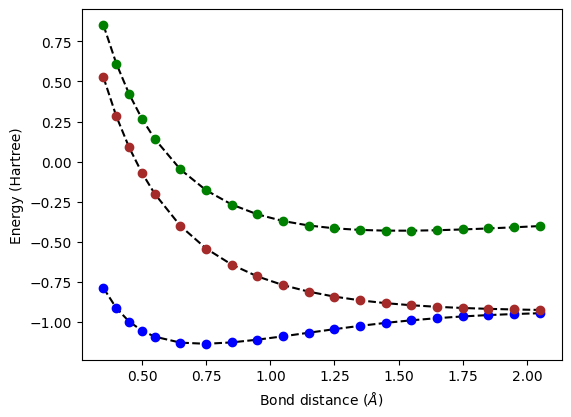

In [ ]:
# Figure and axes
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(left=0.15, bottom=0.15)

# Axis labels and title
ax.set_xlabel('Bond distance ($\AA$)')
ax.set_ylabel('Energy (Hartree)')

# Plot the curves
ax.plot(hhdis_ref, fci_ens_ref[:, 0], '--', color='black')
ax.plot(hhdis_ref, ssvqe_ens_snap_nd4[:, 0], 'o', color='blue')
ax.plot(hhdis_ref, fci_ens_ref[:, 1], '--', color='black')
ax.plot(hhdis_ref, ssvqe_ens_snap_nd4[:, 1], 'o', color='brown')
ax.plot(hhdis_ref, fci_ens_ref[:, 2], '--', color='black')
ax.plot(hhdis_ref, ssvqe_ens_snap_nd4[:, 2], 'o', color='green')

# Save
plt.savefig('h2mol_ssvqe_en_snap_nd4.pdf', dpi=500)

# Show the plot
plt.show()

In [ ]:
en_error_ssvqe_snap_nd4 = np.zeros(fci_ens_ref.shape[0])
en_error_ssvqe_qubit = np.zeros(fci_ens_ref.shape[0])
en_error_vqd_qubit = np.zeros(fci_ens_ref.shape[0])
en_error_ssqite_qubit = np.zeros(fci_ens_ref.shape[0])

for i in range(fci_ens_ref.shape[0]):
    en_error_ssvqe_snap_nd4[i] = np.sum(np.abs(fci_ens_ref[i, :3] - ssvqe_ens_snap_nd4[i, :3])) / 3
    en_error_ssvqe_qubit[i] = np.sum(np.abs(fci_ens_ref[i, :3] - ssvqe_qubit_bfgs[i, :3])) / 3
    en_error_vqd_qubit[i] = np.sum(np.abs(fci_ens_ref[i, :3] - vqd_qubit_bfgs[i, :3])) / 3
    en_error_ssqite_qubit[i] = np.sum(np.abs(fci_ens_ref[i, :3] - ssqite_qubit[i, :3])) / 3

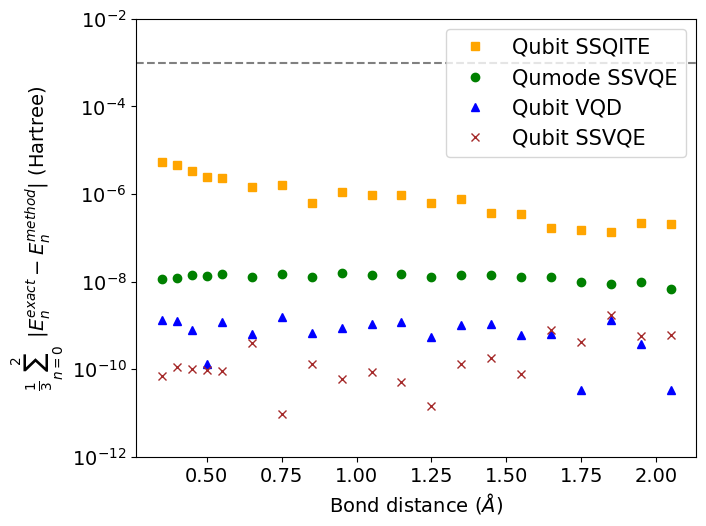

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(left=0.2, bottom=0.15)  # Adjust margins

# Axis labels and title
ax.set_xlabel('Bond distance ($\AA$)')
ax.set_ylabel(r'$ \frac{1}{3} \sum_{n = 0}^2 \: \: | E_n^{exact} - E_n^{method} | $ (Hartree)')

# Plot the curves with pretty colors and patterns
ax.plot(hhdis_ref, en_error_ssqite_qubit, 's', color='orange', label='Qubit SSQITE')
ax.plot(hhdis_ref, en_error_ssvqe_snap_nd4, 'o', color='green', label='Qumode SSVQE')
ax.plot(hhdis_ref, en_error_vqd_qubit, '^', color='blue', label='Qubit VQD')
ax.plot(hhdis_ref, en_error_ssvqe_qubit, 'x', color='brown', label='Qubit SSVQE')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Add horizontal line
ax.axhline(y=1e-3, color='grey', linestyle='--', linewidth=1.5)

# Set y-axis limits to create space above 10^-3
ax.set_ylim(1e-12, 1e-2)  # Adjust these limits as needed

# Legend
ax.legend(loc='upper right', fontsize="15")

# Save
#plt.savefig('h2mol_sum_en_error.pdf', dpi=300)  # Adjust DPI if needed

# Show the plot
plt.show()

## Displaced QHO

### Data

In [ ]:
alpha_vals_nq2 = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])


en_true_nq2_ns2 = np.array([[0.5       , 1.49963567],
       [0.5       , 1.4985456 ],
       [0.5       , 1.49673848],
       [0.5       , 1.49422851],
       [0.49999998, 1.49103505],
       [0.49999995, 1.48718206],
       [0.49999988, 1.48269757],
       [0.49999974, 1.47761298],
       [0.49999947, 1.47196241],
       [0.49999901, 1.46578205],
       [0.49999826, 1.45910947],
       [0.49999708, 1.45198312],
       [0.49999529, 1.4444417 ],
       [0.49999269, 1.43652383],
       [0.49998899, 1.42826756],
       [0.49998385, 1.41971015],
       [0.49997688, 1.41088781],
       [0.49996759, 1.4018355 ],
       [0.49995542, 1.39258684],
       [0.5       , 1.5       ]])


en_disp_nq2_ns2 = np.array([[0.5       , 1.49999997],
       [0.5       , 1.49999952],
       [0.5       , 1.49999757],
       [0.5       , 1.49999234],
       [0.49999999, 1.49998133],
       [0.49999998, 1.49996135],
       [0.49999996, 1.49992856],
       [0.49999991, 1.49987843],
       [0.49999982, 1.49980582],
       [0.49999967, 1.49970497],
       [0.49999942, 1.49956957],
       [0.49999902, 1.49939273],
       [0.49999842, 1.49916708],
       [0.49999754, 1.49888476],
       [0.4999963 , 1.49853749],
       [0.49999456, 1.49811661],
       [0.49999221, 1.49761312],
       [0.49998906, 1.49701773],
       [0.49998493, 1.4963209 ],
       [0.5       , 1.5       ]])

In [ ]:
alpha_vals_nq3 = np.array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])


en_true_nq3_ns4 = np.array([[0.5       , 1.5       , 2.5       , 3.49666312],
       [0.5       , 1.5       , 2.5       , 3.48659626],
       [0.5       , 1.5       , 2.49999998, 3.46954993],
       [0.5       , 1.5       , 2.49999966, 3.44495308],
       [0.5       , 1.49999999, 2.49999699, 3.41198726],
       [0.5       , 1.49999995, 2.49998214, 3.36999424],
       [0.5       , 1.49999968, 2.49992069, 3.31902833],
       [0.5       , 1.49999849, 2.49971509, 3.26019927],
       [0.49999998, 1.49999422, 2.4991305 , 3.19565516],
       [0.49999992, 1.49998108, 2.49766914, 3.12836186],
       [0.49999972, 1.49994552, 2.49438757, 3.06191787],
       [0.49999912, 1.4998592 , 2.48769969, 3.00049553],
       [0.49999751, 1.49966812, 2.47535535, 2.94873516],
       [0.49999361, 1.49927778, 2.45500642, 2.91114481],
       [0.49998484, 1.49853533, 2.42556505, 2.89075995],
       [0.49996646, 1.49721174, 2.38838418, 2.88800363],
       [0.49993028, 1.49499086, 2.34687868, 2.9011073 ],
       [0.49986302, 1.49147597, 2.30509222, 2.92756931],
       [0.49974435, 1.48622866, 2.26665071, 2.96519265],
       [0.5       , 1.5       , 2.5       , 3.5       ]])


en_disp_nq3_ns4 = np.array([[0.5       , 1.5       , 2.5       , 3.5       ],
       [0.5       , 1.5       , 2.5       , 3.49999994],
       [0.5       , 1.5       , 2.5       , 3.49999857],
       [0.5       , 1.5       , 2.49999993, 3.49998626],
       [0.5       , 1.5       , 2.4999994 , 3.49992187],
       [0.5       , 1.49999998, 2.49999643, 3.49968304],
       [0.5       , 1.49999989, 2.49998421, 3.49898506],
       [0.5       , 1.49999947, 2.49994361, 3.49727609],
       [0.49999999, 1.49999794, 2.49982954, 3.4936322 ],
       [0.49999996, 1.49999316, 2.49954915, 3.48669136],
       [0.49999987, 1.49998   , 2.49893194, 3.47467473],
       [0.49999957, 1.49994746, 2.49769466, 3.45554263],
       [0.49999878, 1.49987403, 2.49540804, 3.42731842],
       [0.4999968 , 1.499721  , 2.49147685, 3.38858531],
       [0.49999223, 1.49942379, 2.48514889, 3.33912329],
       [0.49998242, 1.49888198, 2.47557053, 3.28061091],
       [0.49996258, 1.49794985, 2.46190527, 3.21727904],
       [0.49992468, 1.49643035, 2.44352668, 3.15637871],
       [0.49985588, 1.49407681, 2.42028736, 3.10832252],
       [0.5       , 1.5       , 2.5       , 3.5       ]])

In [ ]:
# From Cameron

alpha_qubit_ssvqe = np.array([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])

en_qubit_ssvqe = np.array([[0.5       , 1.5       , 2.5       ],
                    [0.49944056, 1.5050064 , 2.49699622],
                    [0.49795513, 1.51976521, 2.48836755],
                    [0.49416488, 1.54762722, 2.47285657],
                    [0.49444916, 1.57561967, 2.45866386],
                    [0.49385915, 1.61497303, 2.44036635],
                    [0.49496942, 1.66090757, 2.42153919],
                    [0.49836635, 1.71283453, 2.4032742 ],
                    [0.50453638, 1.77030991, 2.38645645]])

### Plots

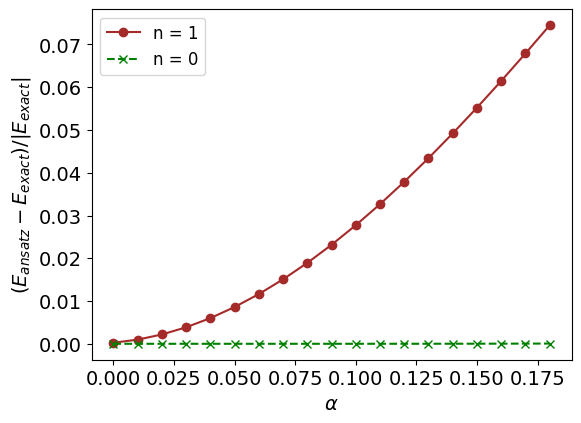

In [ ]:
# Figure and axes
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(left=0.15, bottom=0.15)

# Data
error_vec_n0 = ( en_disp_nq2_ns2[:-1, 0] - en_true_nq2_ns2[:-1, 0]) / np.abs( en_true_nq2_ns2[:-1, 0] )
error_vec_n1 = ( en_disp_nq2_ns2[:-1, 1] - en_true_nq2_ns2[:-1, 1]) / np.abs( en_true_nq2_ns2[:-1, 1] )
alpha_vec = alpha_vals_nq2[:-1]

# Axis labels and title
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$( E_{ansatz} - E_{exact} )/|E_{exact}|$')

# Plot the curves
ax.plot(alpha_vec, error_vec_n1, linestyle='-', marker='o', color='brown', label='n = 1')
ax.plot(alpha_vec, error_vec_n0, linestyle='--', marker='x', color='green', label='n = 0')

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

# Save
#plt.savefig('disp_qho_en_nq2.pdf', dpi=500)

# Show the plot
plt.show()

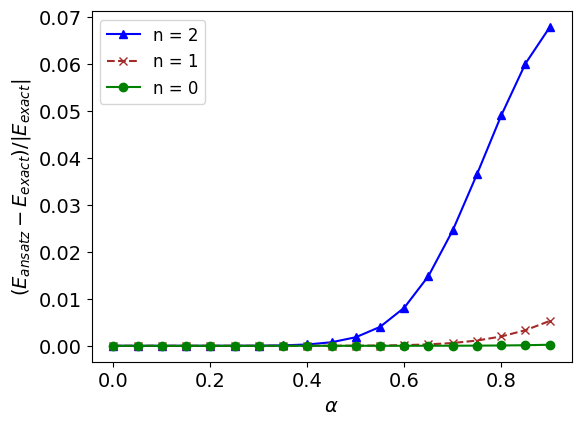

In [ ]:
# Figure and axes
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(left=0.15, bottom=0.15)

# Data
error_vec_n0 = ( en_disp_nq3_ns4[:-1, 0] - en_true_nq3_ns4[:-1, 0]) / np.abs( en_true_nq3_ns4[:-1, 0] )
error_vec_n1 = ( en_disp_nq3_ns4[:-1, 1] - en_true_nq3_ns4[:-1, 1]) / np.abs( en_true_nq3_ns4[:-1, 1] )
error_vec_n2 = ( en_disp_nq3_ns4[:-1, 2] - en_true_nq3_ns4[:-1, 2]) / np.abs( en_true_nq3_ns4[:-1, 2] )
alpha_vec = alpha_vals_nq3[:-1]

# Axis labels and title
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$( E_{ansatz} - E_{exact} )/|E_{exact}|$')

# Plot the curves
ax.plot(alpha_vec, error_vec_n2, linestyle='-', marker='^', color='blue', label='n = 2')
ax.plot(alpha_vec, error_vec_n1, linestyle='--', marker='x', color='brown', label='n = 1')
ax.plot(alpha_vec, error_vec_n0, linestyle='-', marker='o', color='green', label='n = 0')

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

# Save
#plt.savefig('disp_qho_en_nq3.pdf', dpi=500)

# Show the plot
plt.show()

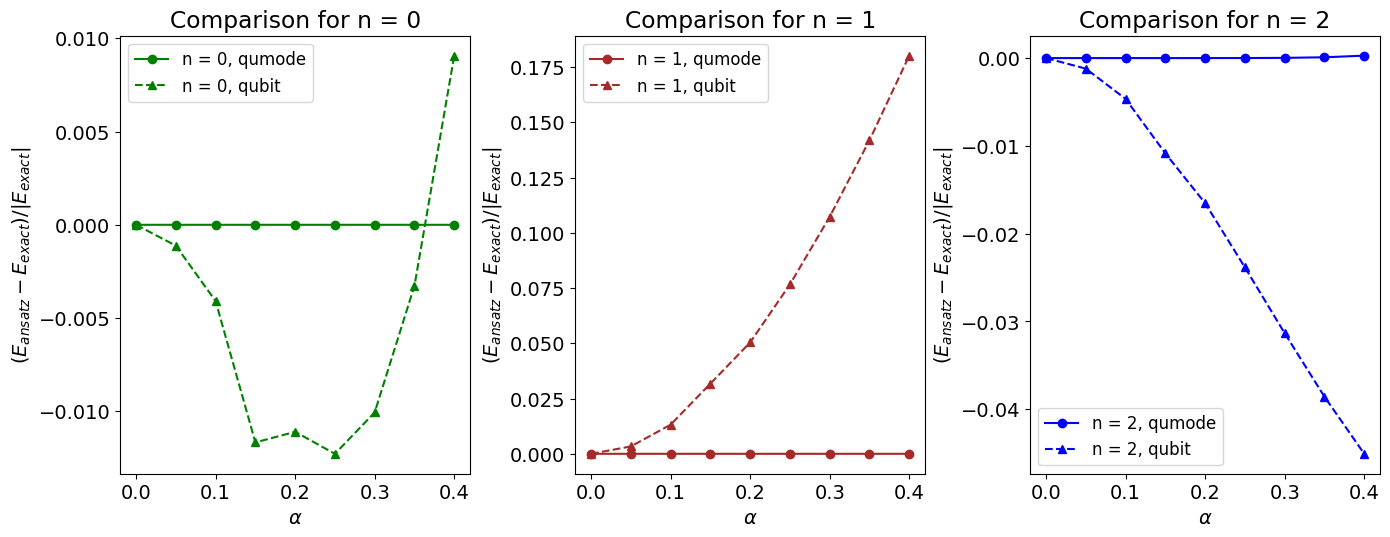

In [ ]:
# Figure and axes (creating three subplots)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.85, wspace=0.3)  # Adjust the space between subplots

# Data (using only first 9 points for consistency)
alpha_vec = alpha_vals_nq3[:9]
error_vec_n0c = (en_disp_nq3_ns4[:9, 0] - en_true_nq3_ns4[:9, 0]) / np.abs(en_true_nq3_ns4[:9, 0])
error_vec_n1c = (en_disp_nq3_ns4[:9, 1] - en_true_nq3_ns4[:9, 1]) / np.abs(en_true_nq3_ns4[:9, 1])
error_vec_n2c = (en_disp_nq3_ns4[:9, 2] - en_true_nq3_ns4[:9, 2]) / np.abs(en_true_nq3_ns4[:9, 2])

error_vec_n0q = (en_qubit_ssvqe[:9, 0] - en_true_nq3_ns4[:9, 0]) / np.abs(en_true_nq3_ns4[:9, 0])
error_vec_n1q = (en_qubit_ssvqe[:9, 1] - en_true_nq3_ns4[:9, 1]) / np.abs(en_true_nq3_ns4[:9, 1])
error_vec_n2q = (en_qubit_ssvqe[:9, 2] - en_true_nq3_ns4[:9, 2]) / np.abs(en_true_nq3_ns4[:9, 2])

# Plot the curves in the first subplot (compare n = 0)
ax[0].plot(alpha_vec, error_vec_n0c, linestyle='-', marker='o', color='green', label='n = 0, qumode')
ax[0].plot(alpha_vec, error_vec_n0q, linestyle='--', marker='^', color='green', label='n = 0, qubit')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'$( E_{ansatz} - E_{exact} )/|E_{exact}|$')
ax[0].set_title('Comparison for n = 0')
ax[0].legend(loc='upper left', fontsize=12)

# Plot the curves in the second subplot (compare n = 1)
ax[1].plot(alpha_vec, error_vec_n1c, linestyle='-', marker='o', color='brown', label='n = 1, qumode')
ax[1].plot(alpha_vec, error_vec_n1q, linestyle='--', marker='^', color='brown', label='n = 1, qubit')
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel(r'$( E_{ansatz} - E_{exact} )/|E_{exact}|$')
ax[1].set_title('Comparison for n = 1')
ax[1].legend(loc='upper left', fontsize=12)

# Plot the curves in the third subplot (compare n = 2)
ax[2].plot(alpha_vec, error_vec_n2c, linestyle='-', marker='o', color='blue', label='n = 2, qumode')
ax[2].plot(alpha_vec, error_vec_n2q, linestyle='--', marker='^', color='blue', label='n = 2, qubit')
ax[2].set_xlabel(r'$\alpha$')
ax[2].set_ylabel(r'$( E_{ansatz} - E_{exact} )/|E_{exact}|$')
ax[2].set_title('Comparison for n = 2')
ax[2].legend(loc='lower left', fontsize=12)

# Save
#plt.savefig('disp_qho_nq3_en_errors.pdf', dpi=500)

# Show the plot
plt.show()

## Cytosine

In [4]:
# wvec = [1, 1, 1]

ref_ens_cyt = np.array([-3.59549041, -3.5915844 , -3.59134506])

ens_cyt_cobyla_qubit_nd10 = np.array([-3.4908107340430923, -3.436816653043101, -3.350250150520276])


ens_cyt_cobyla_snap_nd1 = np.array([-3.5763946 ,-3.50738846,-3.47708406])

Xvec_cyt_cobyla_snap_nd1 = np.array([0.51067   ,1.94968912,2.96332725,0.06812199,0.46807597,2.60585417,
 2.62612884,1.5994546 ,2.08174837,2.53196603,2.59036737,1.24910682,
 2.20276228,2.94815654,2.11298925,1.07893793,2.44096016])

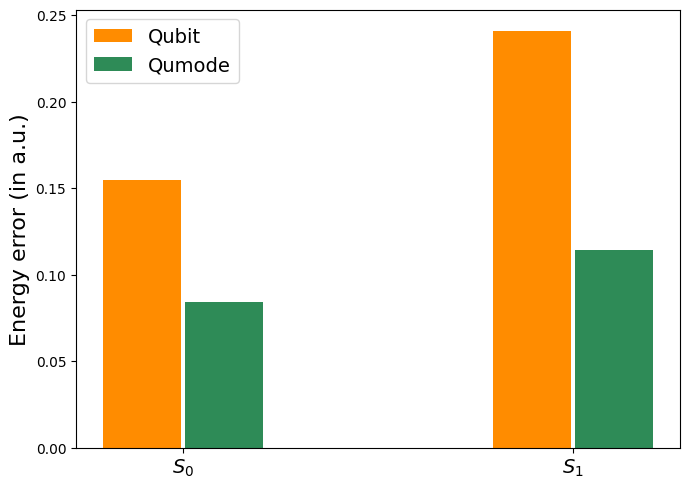

In [5]:
# Bar labels
labels = [r'$S_0$', r'$S_1$']
x = np.array([0, 0.1])

# Bar setup
width = 0.02  # narrower bars
spacing = 0.001  # spacing between bars within a group

# Compute positions centered around each x
bar1_x = x - (width + spacing)/2
bar2_x = x + (width + spacing)/2

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(bar1_x, ens_cyt_cobyla_qubit_nd10[1:] - ref_ens_cyt[1:], width, label='Qubit', color='darkorange')
ax.bar(bar2_x, ens_cyt_cobyla_snap_nd1[1:] - ref_ens_cyt[1:], width, label='Qumode', color='seagreen')

# Aesthetics
ax.set_ylabel(r'Energy error (in a.u.)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(fontsize=14)

plt.tight_layout()

# Save as high-resolution image
#plt.savefig("cyt_en_compare.pdf", dpi=500)

plt.show()